In [59]:
!pip install faker

In [60]:
import pandas as pd
from faker import Faker
import random
from enum import Enum

fake = Faker()

# make class of ENUM type for exercise type
class ExerciseTypeEnum(Enum):
    UpperBody = 'UpperBody'
    LowerBody = 'LowerBody'
    FullBody = 'FullBody'
    Core = 'Core'
    Cardio = 'Cardio'
    Stretch = 'Stretch'

# make class of ENUM type for goal type
class GoalTypeEnum(Enum):
    GainWeight = 'Gain Weight'
    LoseWeight = 'Lose Weight'
    MaintainWeight = 'Maintain Weight'
    Workout30Times = 'Workout 30 times'
    Workout60Times = 'Workout 60 times'
    Workout90Times = 'Workout 90 times'
    BMIUnder30 = 'BMI Under 30'
    BMIUnder20 = 'BMI Under 20'
    BMIUnder15 = 'BMI Under 15'

# make class of ENUM type for goal status type
class GoalStatusEnum(Enum):
    InProgress = 'In Progress'
    Completed = 'Completed'
    Abandoned = 'Abandoned'

# Entity 1: User
def gen_user(Num_Row):
    data = {
        "UserID": range(1, Num_Row + 1),
        "FirstName": [fake.first_name() for _ in range(Num_Row)],
        "LastName": [fake.last_name() for _ in range(Num_Row)],
        "PhoneNumber": [fake.phone_number() for _ in range(Num_Row)],
        "Email": [fake.email() for _ in range(Num_Row)],
        "Age": [random.randint(18, 90) for _ in range(Num_Row)],
        "Weight": [random.uniform(100, 500) for _ in range(Num_Row)],  # Weight in lbs
        "Height": [random.uniform(48, 96) for _ in range(Num_Row)],  # Height in inches
        "Gender": [random.choice(['Male', 'Female', 'Other', 'None']) for _ in range(Num_Row)]
    }
    return pd.DataFrame(data)

# Entity 2: Workout
def gen_workout(Num_Row, user_df):
    data = {
        "WorkoutID": range(1, Num_Row + 1),
        "UserID": random.choices(user_df["UserID"], k=Num_Row),
        "WorkoutDate": [fake.date_this_year() for _ in range(Num_Row)],
        "Duration": [random.randint(1, 240) for _ in range(Num_Row)],  # Duration in minutes
    }
    return pd.DataFrame(data)

# Entity 3: Exercise
def gen_exercise(Num_Row, workout_df):
    data = {
        "ExerciseID": range(1, Num_Row + 1),
        # "UserID": random.choices(workout_df["UserID"], k=Num_Row),
        "WorkoutID": random.choices(workout_df["WorkoutID"], k=Num_Row),
        "ExerciseType": [random.choice(list(ExerciseTypeEnum)).value for _ in range(Num_Row)],
        "Repetitions": [random.randint(1, 30) for _ in range(Num_Row)],  # Repetitions
        "Sets": [random.randint(1, 30) for _ in range(Num_Row)],  # Sets
    }
    # To ensure consistent foreign key relationship, get UserID based on WorkoutID
    data["UserID"] = [workout_df.loc[workout_df["WorkoutID"] == wid, "UserID"].values[0] for wid in data["WorkoutID"]]
    return pd.DataFrame(data)

# Entity 4: Fitness Goals
def gen_fitness_goal(Num_Row, user_df):
    data = {
        "GoalID": range(1, Num_Row + 1),
        "UserID": [random.choice(user_df["UserID"]) for _ in range(Num_Row)],
        "Description": [random.choice(list(GoalTypeEnum)).value for _ in range(Num_Row)],
        "TargetDate": [fake.date_between(start_date='today', end_date='+1y') for _ in range(Num_Row)],
        "CurrentStatus": [random.choice(list(GoalStatusEnum)).value for _ in range(Num_Row)]
    }
    return pd.DataFrame(data)

# Entity 5: Progress Tracking
def gen_progress_tracking(Num_Row, user_df, workout_df, goal_df):
    data = {
        "ProgressID": range(1, Num_Row + 1),
        "WorkoutID": random.choices(workout_df["WorkoutID"], k=Num_Row),
        "GoalID": random.choices(goal_df["GoalID"], k=Num_Row),
        "ProgressDate": [fake.date_this_year() for _ in range(Num_Row)],
        "BMI": [703 * weight / (height ** 2) for weight, height in zip(user_df['Weight'], user_df['Height'])]  # BMI range, adjust as necessary
    }
    # To ensure consistent foreign key relationship, get UserID based on WorkoutID
    data["UserID"] = [workout_df.loc[workout_df["WorkoutID"] == wid, "UserID"].values[0] for wid in data["WorkoutID"]]
    return pd.DataFrame(data)

# Make user data
user_data = gen_user(10000)
user_data.to_csv('User_Data.csv', index=False)

# Read data from CSV
user_data_from_csv = pd.read_csv('User_Data.csv')

# Make workout data using user data from CSV
workout_data = gen_workout(10000, user_data_from_csv)
workout_data.to_csv('Workout_Data.csv', index=False)

# Make exercise data using workout data
exercise_data = gen_exercise(10000, workout_data)
exercise_data.to_csv('Exercise_Data.csv', index=False)

# Make fitness goal data using user data from CSV
fitness_goal_data = gen_fitness_goal(10000, user_data_from_csv)
fitness_goal_data.to_csv('Fitness_Goal_Data.csv', index=False)

# Make progress tracking data using user, workout, and goal data from CSV
progress_tracking_data = gen_progress_tracking(10000, user_data_from_csv, workout_data, fitness_goal_data)
progress_tracking_data.to_csv('Progress_Tracking_Data.csv', index=False)

print(user_data.head())
print(workout_data.head())
print(exercise_data.head())
print(fitness_goal_data.head())
print(progress_tracking_data.head())

   UserID FirstName  LastName           PhoneNumber                     Email  \
0       1   Shannon  Gonzalez     932-206-3095x3796     probinson@example.net   
1       2     Debra  Williams          246.235.8721    beckygomez@example.net   
2       3   Michael      Cobb   +1-265-716-4896x344  wilcoxsteven@example.org   
3       4   Kristen    Bailey            7447797504       pgeorge@example.net   
4       5     Carol     Adams  001-772-685-3449x312      ychapman@example.net   

   Age      Weight     Height Gender  
0   59  283.540750  50.050043  Other  
1   73  202.339507  83.479094   None  
2   89  221.142574  77.677899  Other  
3   88  277.112938  94.741601   Male  
4   43  159.921994  74.026013  Other  
   WorkoutID  UserID WorkoutDate  Duration
0          1    8062  2024-06-04       202
1          2    1469  2024-04-09       138
2          3     435  2024-02-08        14
3          4    2819  2024-02-22        45
4          5    4635  2024-04-22       116
   ExerciseID  Workou

In [61]:
import sqlite3
conn=sqlite3.connect('fitness_tracker_app.db') # connect method builds a db
cursor=conn.cursor() # db should show up in files to left in colab

In [62]:
import sqlite3
import pandas as pd
from faker import Faker
import random

# Make user data
def gen_user(Num_Row):
    fake = Faker()
    data = {
        "FirstName": [fake.first_name() for _ in range(Num_Row)],
        "LastName": [fake.last_name() for _ in range(Num_Row)],
        "PhoneNumber": [fake.phone_number() for _ in range(Num_Row)],
        "Email": [fake.email() for _ in range(Num_Row)],
        "Age": [random.randint(18, 90) for _ in range(Num_Row)],
        "Weight": [random.uniform(100, 500) for _ in range(Num_Row)],  # Weight in lbs
        "Height": [random.uniform(48, 96) for _ in range(Num_Row)],  # Height in inches
        "Gender": [random.choice(['Male', 'Female', 'Other', 'None']) for _ in range(Num_Row)]
    }
    return pd.DataFrame(data)

# Read CSV files
user_data = pd.read_csv('User_Data.csv')
workout_data = pd.read_csv('Workout_Data.csv')
exercise_data = pd.read_csv('Exercise_Data.csv')
fitness_goal_data = pd.read_csv('Fitness_Goal_Data.csv')
progress_tracking_data = pd.read_csv('Progress_Tracking_Data.csv')

# Connect to db
conn = sqlite3.connect('/content/fitness_tracker_app.db')
cursor = conn.cursor()

# make entity tables
cursor.execute('''
    CREATE TABLE IF NOT EXISTS User (
        UserID INTEGER PRIMARY KEY AUTOINCREMENT,
        FirstName VARCHAR,
        LastName VARCHAR,
        PhoneNumber VARCHAR,
        Age INT,
        Weight FLOAT,
        Height FLOAT,
        Gender VARCHAR,
        Email VARCHAR
    )
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS Workout (
        WorkoutID INTEGER PRIMARY KEY AUTOINCREMENT,
        UserID INTEGER,
        WorkoutDate DATE,
        Duration INT,
        FOREIGN KEY (UserID) REFERENCES User (UserID)
    )
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS Exercise (
        ExerciseID INTEGER PRIMARY KEY AUTOINCREMENT,
        UserID INTEGER,
        WorkoutID INTEGER,
        ExerciseType VARCHAR,
        Repetitions INT,
        Sets INT,
        FOREIGN KEY (UserID) REFERENCES User (UserID),
        FOREIGN KEY (WorkoutID) REFERENCES Workout (WorkoutID)
    )
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS FitnessGoals (
        GoalID INTEGER PRIMARY KEY AUTOINCREMENT,
        UserID INTEGER,
        Description VARCHAR,
        TargetDate DATE,
        CurrentStatus VARCHAR,
        FOREIGN KEY (UserID) REFERENCES User (UserID)
    )
''')

cursor.execute('''
    CREATE TABLE IF NOT EXISTS ProgressTracking (
        ProgressID INTEGER PRIMARY KEY AUTOINCREMENT,
        UserID INTEGER,
        WorkoutID INTEGER,
        GoalID INTEGER,
        ProgressDate DATE,
        BMI FLOAT,
        FOREIGN KEY (UserID) REFERENCES User (UserID),
        FOREIGN KEY (WorkoutID) REFERENCES Workout (WorkoutID),
        FOREIGN KEY (GoalID) REFERENCES FitnessGoals (GoalID)
    )
''')

# make user log entity
cursor.execute('''
  CREATE TABLE IF NOT EXISTS user_log (
    UserLogID INTEGER PRIMARY KEY AUTOINCREMENT,
    operation_type VARCHAR(10),
    table_name VARCHAR(50),
    timestamp TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
    UserID INTEGER
)
''')

cursor.execute('''
CREATE TRIGGER IF NOT EXISTS log_insert_user
AFTER INSERT ON User
FOR EACH ROW
BEGIN
    INSERT INTO user_log (operation_type, table_name)
    VALUES ('INSERT', 'User');
END;
''')

cursor.execute('''
CREATE TRIGGER IF NOT EXISTS log_update_user
AFTER UPDATE ON User
FOR EACH ROW
BEGIN
    INSERT INTO user_log (operation_type, table_name)
    VALUES ('UPDATE', 'User');
END
''')

cursor.execute('''
CREATE TRIGGER IF NOT EXISTS log_delete_user
AFTER DELETE ON User
FOR EACH ROW
BEGIN
    INSERT INTO user_log (operation_type, table_name)
    VALUES ('DELETE', 'User');
END;
''')

# make workout log entity
cursor.execute('''
  CREATE TABLE IF NOT EXISTS workout_log (
    WorkoutLogID INTEGER PRIMARY KEY AUTOINCREMENT,
    operation_type VARCHAR(10),
    table_name VARCHAR(50),
    timestamp TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
    WorkoutID INTEGER
)
''')

cursor.execute('''
CREATE TRIGGER IF NOT EXISTS log_insert_workout
AFTER INSERT ON Workout
FOR EACH ROW
BEGIN
    INSERT INTO workout_log (operation_type, table_name)
    VALUES ('INSERT', 'Workout');
END;
''')

cursor.execute('''
CREATE TRIGGER IF NOT EXISTS log_update_workout
AFTER UPDATE ON Workout
FOR EACH ROW
BEGIN
    INSERT INTO workout_log (operation_type, table_name)
    VALUES ('UPDATE', 'Workout');
END
''')

cursor.execute('''
CREATE TRIGGER IF NOT EXISTS log_delete_workout
AFTER DELETE ON Workout
FOR EACH ROW
BEGIN
    INSERT INTO workout_log (operation_type, table_name)
    VALUES ('DELETE', 'Workout');
END;
''')

# make exercise log entity
cursor.execute('''
  CREATE TABLE IF NOT EXISTS exercise_log (
    ExerciseLogID INTEGER PRIMARY KEY AUTOINCREMENT,
    operation_type VARCHAR(10),
    table_name VARCHAR(50),
    timestamp TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
    ExerciseID INTEGER
)
''')

cursor.execute('''
CREATE TRIGGER IF NOT EXISTS log_insert_exercise
AFTER INSERT ON Exercise
FOR EACH ROW
BEGIN
    INSERT INTO exercise_log (operation_type, table_name)
    VALUES ('INSERT', 'Exercise');
END;
''')

cursor.execute('''
CREATE TRIGGER IF NOT EXISTS log_update_exercise
AFTER UPDATE ON Exercise
FOR EACH ROW
BEGIN
    INSERT INTO exercise_log (operation_type, table_name)
    VALUES ('UPDATE', 'Exercise');
END
''')

cursor.execute('''
CREATE TRIGGER IF NOT EXISTS log_delete_exercise
AFTER DELETE ON Exercise
FOR EACH ROW
BEGIN
    INSERT INTO exercise_log (operation_type, table_name)
    VALUES ('DELETE', 'Exercise');
END;
''')

# make fitness goals log entity
cursor.execute('''
  CREATE TABLE IF NOT EXISTS fitnessgoals_log (
    FitnessGoalsLogID INTEGER PRIMARY KEY AUTOINCREMENT,
    operation_type VARCHAR(10),
    table_name VARCHAR(50),
    timestamp TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
    GoalID INTEGER
)
''')

cursor.execute('''
CREATE TRIGGER IF NOT EXISTS log_insert_fitnessgoals
AFTER INSERT ON FitnessGoals
FOR EACH ROW
BEGIN
    INSERT INTO fitnessgoals_log (operation_type, table_name)
    VALUES ('INSERT', 'FitnessGoals');
END;
''')

cursor.execute('''
CREATE TRIGGER IF NOT EXISTS log_update_fitnessgoals
AFTER UPDATE ON FitnessGoals
FOR EACH ROW
BEGIN
    INSERT INTO fitnessgoals_log (operation_type, table_name)
    VALUES ('UPDATE', 'FitnessGoals');
END
''')

cursor.execute('''
CREATE TRIGGER IF NOT EXISTS log_delete_fitnessgoals
AFTER DELETE ON FitnessGoals
FOR EACH ROW
BEGIN
    INSERT INTO fitnessgoals_log (operation_type, table_name)
    VALUES ('DELETE', 'FitnessGoals');
END;
''')

# make progress trakcking entity log
cursor.execute('''
  CREATE TABLE IF NOT EXISTS progresstracking_log (
    ProgressTrackingLogID INTEGER PRIMARY KEY AUTOINCREMENT,
    operation_type VARCHAR(10),
    table_name VARCHAR(50),
    timestamp TIMESTAMP DEFAULT CURRENT_TIMESTAMP,
    ProgressID INTEGER
)
''')

cursor.execute('''
CREATE TRIGGER IF NOT EXISTS log_insert_progresstracking
AFTER INSERT ON ProgressTracking
FOR EACH ROW
BEGIN
    INSERT INTO progresstracking_log (operation_type, table_name)
    VALUES ('INSERT', 'ProgressTracking');
END;
''')

cursor.execute('''
CREATE TRIGGER IF NOT EXISTS log_update_progresstracking
AFTER UPDATE ON ProgressTracking
FOR EACH ROW
BEGIN
    INSERT INTO progresstracking_log (operation_type, table_name)
    VALUES ('UPDATE', 'ProgressTracking');
END
''')

cursor.execute('''
CREATE TRIGGER IF NOT EXISTS log_delete_progresstracking
AFTER DELETE ON ProgressTracking
FOR EACH ROW
BEGIN
    INSERT INTO progresstracking_log (operation_type, table_name)
    VALUES ('DELETE', 'ProgressTracking');
END;
''')


# insert df into table
def insert_dataframe_to_table(df, table_name, conn):
    # Remove the UserID if it exists
    if 'UserID' in df.columns:
        df = df.drop(columns=['UserID'])
    df.to_sql(table_name, conn, if_exists='append', index=False)

# Put data into the right tables
insert_dataframe_to_table(user_data, 'User', conn)
insert_dataframe_to_table(workout_data, 'Workout', conn)
insert_dataframe_to_table(exercise_data, 'Exercise', conn)
insert_dataframe_to_table(fitness_goal_data, 'FitnessGoals', conn)
insert_dataframe_to_table(progress_tracking_data, 'ProgressTracking', conn)

# commit the changes
conn.commit()


In [63]:
# check user data df
user_data_df = pd.read_sql_query('SELECT * FROM User', conn)
print(user_data_df.head())

   UserID FirstName  LastName           PhoneNumber  Age      Weight  \
0       1   Shannon  Gonzalez     932-206-3095x3796   59  283.540750   
1       2     Debra  Williams          246.235.8721   73  202.339507   
2       3   Michael      Cobb   +1-265-716-4896x344   89  221.142574   
3       4   Kristen    Bailey            7447797504   88  277.112938   
4       5     Carol     Adams  001-772-685-3449x312   43  159.921994   

      Height Gender                     Email  
0  50.050043  Other     probinson@example.net  
1  83.479094   None    beckygomez@example.net  
2  77.677899  Other  wilcoxsteven@example.org  
3  94.741601   Male       pgeorge@example.net  
4  74.026013  Other      ychapman@example.net  


In [64]:
# check workout data df
workout_data_df = pd.read_sql_query('SELECT * FROM Workout', conn)
print(workout_data_df.head())

   WorkoutID UserID WorkoutDate  Duration
0          1   None  2024-06-04       202
1          2   None  2024-04-09       138
2          3   None  2024-02-08        14
3          4   None  2024-02-22        45
4          5   None  2024-04-22       116


In [65]:
# check exercise data df
exercise_data_df = pd.read_sql_query('SELECT * FROM Exercise', conn)
print(exercise_data_df.head())

   ExerciseID UserID  WorkoutID ExerciseType  Repetitions  Sets
0           1   None       7014       Cardio           25    12
1           2   None       6557         Core            5    26
2           3   None       9281    UpperBody            1     9
3           4   None        396         Core            4    11
4           5   None       7745    LowerBody           12    12


In [66]:
# check fitness goals df
fitnessgoals_data_df = pd.read_sql_query('SELECT * FROM FitnessGoals', conn)
print(fitnessgoals_data_df.head())

   GoalID UserID       Description  TargetDate CurrentStatus
0       1   None      BMI Under 30  2025-06-12     Completed
1       2   None  Workout 30 times  2025-02-26     Completed
2       3   None      BMI Under 30  2024-11-05   In Progress
3       4   None  Workout 60 times  2025-03-27     Abandoned
4       5   None      BMI Under 15  2025-07-10     Abandoned


In [67]:
# check progress tracking df
progresstrack_data_df = pd.read_sql_query('SELECT * FROM ProgressTracking', conn)
print(progresstrack_data_df.head())

   ProgressID UserID  WorkoutID  GoalID ProgressDate        BMI
0           1   None       3390    1492   2024-04-15  79.572299
1           2   None       4144    8748   2024-07-27  20.411765
2           3   None       1012    3898   2024-04-20  25.765154
3           4   None        622    1469   2024-01-02  21.703546
4           5   None        381    7417   2024-06-14  20.516100


In [68]:
import pandas as pd

# read the csv files
user_data = pd.read_csv('User_Data.csv')
workout_data = pd.read_csv('Workout_Data.csv')
exercise_data = pd.read_csv('Exercise_Data.csv')
fitness_goal_data = pd.read_csv('Fitness_Goal_Data.csv')
progress_tracking_data = pd.read_csv('Progress_Tracking_Data.csv')

# verify df info
print(user_data.head())
print(workout_data.head())
print(exercise_data.head())
print(fitness_goal_data.head())
print(progress_tracking_data.head())


   UserID FirstName  LastName           PhoneNumber                     Email  \
0       1   Shannon  Gonzalez     932-206-3095x3796     probinson@example.net   
1       2     Debra  Williams          246.235.8721    beckygomez@example.net   
2       3   Michael      Cobb   +1-265-716-4896x344  wilcoxsteven@example.org   
3       4   Kristen    Bailey            7447797504       pgeorge@example.net   
4       5     Carol     Adams  001-772-685-3449x312      ychapman@example.net   

   Age      Weight     Height Gender  
0   59  283.540750  50.050043  Other  
1   73  202.339507  83.479094    NaN  
2   89  221.142574  77.677899  Other  
3   88  277.112938  94.741601   Male  
4   43  159.921994  74.026013  Other  
   WorkoutID  UserID WorkoutDate  Duration
0          1    8062  2024-06-04       202
1          2    1469  2024-04-09       138
2          3     435  2024-02-08        14
3          4    2819  2024-02-22        45
4          5    4635  2024-04-22       116
   ExerciseID  Workou

In [69]:
!pip install sqlalchemy # to make CRUD

In [70]:
# CRUD (Create Read Update Delete) process for User
from sqlalchemy import create_engine, Column, Integer, String, Float, Date, ForeignKey
from sqlalchemy.orm import sessionmaker, relationship
from sqlalchemy.ext.declarative import declarative_base


Base = declarative_base() # keep track of the models

class User(Base):
    __tablename__ = 'User' # define name of table in db
    UserID = Column(Integer, primary_key=True, autoincrement=True)
    FirstName = Column(String)
    LastName = Column(String)
    PhoneNumber = Column(String)
    Email = Column(String)
    Age = Column(Integer)
    Weight = Column(Float)
    Height = Column(Float)
    Gender = Column(String)

class Workout(Base):
    __tablename__ = 'Workout'
    WorkoutID = Column(Integer, primary_key=True, autoincrement=True)
    UserID = Column(Integer, ForeignKey('User.UserID'))
    WorkoutDate = Column(Date)
    Duration = Column(Integer)
    user = relationship("User")

class Exercise(Base):
    __tablename__ = 'Exercise'
    ExerciseID = Column(Integer, primary_key=True, autoincrement=True)
    UserID = Column(Integer, ForeignKey('User.UserID'))
    WorkoutID = Column(Integer, ForeignKey('Workout.WorkoutID'))
    ExerciseType = Column(String)
    Repetitions = Column(Integer)
    Sets = Column(Integer)
    user = relationship("User")
    workout = relationship("Workout")

class FitnessGoal(Base):
    __tablename__ = 'FitnessGoals'
    GoalID = Column(Integer, primary_key=True, autoincrement=True)
    UserID = Column(Integer, ForeignKey('User.UserID'))
    Description = Column(String)
    TargetDate = Column(Date)
    CurrentStatus = Column(String)
    user = relationship("User")

class ProgressTracking(Base):
    __tablename__ = 'ProgressTracking'
    ProgressID = Column(Integer, primary_key=True, autoincrement=True)
    UserID = Column(Integer, ForeignKey('User.UserID'))
    WorkoutID = Column(Integer, ForeignKey('Workout.WorkoutID'))
    GoalID = Column(Integer, ForeignKey('FitnessGoals.GoalID'))
    ProgressDate = Column(Date)
    BMI = Column(Float)
    user = relationship("User")
    workout = relationship("Workout")
    goal = relationship("FitnessGoal")

engine = create_engine('sqlite:///fitness_tracker_app.db')
Base.metadata.create_all(engine)
Session = sessionmaker(bind=engine)
session = Session()


<ipython-input-70-f522dcbe1b2c>:7: MovedIn20Warning: The ``declarative_base()`` function is now available as sqlalchemy.orm.declarative_base(). (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  Base = declarative_base() # keep track of the models


In [71]:
# Add the users
def add_user(first_name, last_name, phone_number, email, age, weight, height, gender):
    new_user = User(
        FirstName=first_name,
        LastName=last_name,
        PhoneNumber=phone_number,
        Email=email,
        Age=age,
        Weight=weight,
        Height=height,
        Gender=gender
    )
    session.add(new_user)
    session.commit()
    return new_user

# example
user = add_user('Ikonkar', 'Khalsa', '231-245-6503', 'queen123@gmail.com', 24, 175, 64, 'Female')
print(user.UserID)


10001


In [72]:
# retrieve the users
def get_all_users():
    users = session.query(User).all()
    return users

# Example
users = get_all_users()
for user in users:
    print(user.FirstName, user.LastName)


Streaming output truncated to the last 5000 lines.
Carol Hebert
Frank Raymond
Jacob Nelson
Jacob Collins
Erica Miller
Rachael Hayes
Eric Lee
Brent Hall
Darius Wise
Carmen Copeland
Alicia Ray
Raymond Ferguson
Terry Riddle
Seth Davis
Donald Davis
Timothy Weaver
Daniel Baker
Michelle Lee
Jeremy Richards
Shawn Griffin
Tyler Moran
Thomas Bradley
Bryan Russell
Kristin Williams
Travis Beck
Shannon Smith
Jacob Knight
Breanna Jones
Melody Wilcox
Michele Huynh
Joshua Jackson
Kristina Lewis
Nina Sullivan
Kevin Lara
Amanda Alexander
Betty Hicks
Karen Jackson
Anne Bennett
Courtney Reynolds
Joseph Hines
Jacqueline Lawrence
Joseph Powers
Aaron Newton
Ashley Nelson
Adrian Robertson
Elizabeth Johnson
Teresa Stephens
Mary Blake
Hailey Douglas
Marc Sanchez
Joshua Meza
Erin Davis
Matthew Castillo
Jenna Castro
Jose Edwards
Derrick Lee
Jared Turner
Taylor Long
Lance Ochoa
Ann Ali
Anthony Simmons
Jason Torres
Amanda Bell
John Davis
Laura Sparks
Cassandra Wilson
Samantha Cooper
William Byrd
Cassidy King
Laure

In [73]:
def get_user_by_id(user_id):
    user = session.query(User).get(user_id)
    return user

# Example usage
user = get_user_by_id(1)
print(user.FirstName, user.LastName)

Shannon Gonzalez


<ipython-input-73-047265d74d9d>:2: LegacyAPIWarning: The Query.get() method is considered legacy as of the 1.x series of SQLAlchemy and becomes a legacy construct in 2.0. The method is now available as Session.get() (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  user = session.query(User).get(user_id)


In [74]:
# update the user info
def update_user(user_id, first_name=None, last_name=None, phone_number=None, email=None, age=None, weight=None, height=None, gender=None):
    user = session.query(User).get(user_id)
    if not user:
        return None

    if first_name:
        user.FirstName = first_name
    if last_name:
        user.LastName = last_name
    if phone_number:
        user.PhoneNumber = phone_number
    if email:
        user.Email = email
    if age:
        user.Age = age
    if weight:
        user.Weight = weight
    if height:
        user.Height = height
    if gender:
        user.Gender = gender

    session.commit()
    return user

# example
updated_user = update_user(1, first_name='Ikky', email='allhailkingikonkar@gmail.com')
print(updated_user.FirstName, updated_user.Email)


<ipython-input-74-69b00b0c6c52>:3: LegacyAPIWarning: The Query.get() method is considered legacy as of the 1.x series of SQLAlchemy and becomes a legacy construct in 2.0. The method is now available as Session.get() (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  user = session.query(User).get(user_id)


Ikky allhailkingikonkar@gmail.com


In [75]:
# check user data df
user_data_df = pd.read_sql_query('SELECT * FROM User', conn)
print(user_data_df.head())

   UserID FirstName  LastName           PhoneNumber  Age      Weight  \
0       1      Ikky  Gonzalez     932-206-3095x3796   59  283.540750   
1       2     Debra  Williams          246.235.8721   73  202.339507   
2       3   Michael      Cobb   +1-265-716-4896x344   89  221.142574   
3       4   Kristen    Bailey            7447797504   88  277.112938   
4       5     Carol     Adams  001-772-685-3449x312   43  159.921994   

      Height Gender                         Email  
0  50.050043  Other  allhailkingikonkar@gmail.com  
1  83.479094   None        beckygomez@example.net  
2  77.677899  Other      wilcoxsteven@example.org  
3  94.741601   Male           pgeorge@example.net  
4  74.026013  Other          ychapman@example.net  


In [76]:
# deleting user info
def delete_user(user_id):
    user = session.query(User).get(user_id)
    if not user:
        return None

    session.delete(user)
    session.commit()
    return user

# example
deleted_user = delete_user(1)
if deleted_user:
    print(f"Deleted user: {deleted_user.FirstName} {deleted_user.LastName}")
else:
    print("User not found")


Deleted user: Ikky Gonzalez


<ipython-input-76-b97787542f38>:3: LegacyAPIWarning: The Query.get() method is considered legacy as of the 1.x series of SQLAlchemy and becomes a legacy construct in 2.0. The method is now available as Session.get() (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  user = session.query(User).get(user_id)


In [77]:
# check user data df
user_data_df = pd.read_sql_query('SELECT * FROM User', conn)
print(user_data_df.head())

   UserID FirstName  LastName           PhoneNumber  Age      Weight  \
0       2     Debra  Williams          246.235.8721   73  202.339507   
1       3   Michael      Cobb   +1-265-716-4896x344   89  221.142574   
2       4   Kristen    Bailey            7447797504   88  277.112938   
3       5     Carol     Adams  001-772-685-3449x312   43  159.921994   
4       6    Thomas     Poole            8393110113   65  243.880843   

      Height Gender                     Email  
0  83.479094   None    beckygomez@example.net  
1  77.677899  Other  wilcoxsteven@example.org  
2  94.741601   Male       pgeorge@example.net  
3  74.026013  Other      ychapman@example.net  
4  76.782354   None   alejandro36@example.com  


In [78]:
import sqlite3
import pandas as pd

# Connect to SQLite db
conn = sqlite3.connect('/content/fitness_tracker_app.db')

# Get list of tables in the db
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(tables_query, conn)['name'].tolist()

# Read and show first 10 rows from each table
for table in tables:
    print(f"First 10 rows of table {table}:")
    df = pd.read_sql_query(f"SELECT * FROM {table} LIMIT 10", conn)
    print(df)
    print("\n")


First 10 rows of table User:
   UserID FirstName    LastName             PhoneNumber  Age      Weight  \
0       2     Debra    Williams            246.235.8721   73  202.339507   
1       3   Michael        Cobb     +1-265-716-4896x344   89  221.142574   
2       4   Kristen      Bailey              7447797504   88  277.112938   
3       5     Carol       Adams    001-772-685-3449x312   43  159.921994   
4       6    Thomas       Poole              8393110113   65  243.880843   
5       7     Shari        Ross    001-483-242-9715x864   72  323.059033   
6       8   Cameron     Freeman  001-354-390-7320x24924   49  102.997915   
7       9      Sara      Wilson           (673)748-9969   53  161.263214   
8      10    Laurie    Thompson     (824)957-4686x45076   57  210.896461   
9      11      Evan  Livingston              2009340979   63  353.946991   

      Height  Gender                      Email  
0  83.479094    None     beckygomez@example.net  
1  77.677899   Other   wilcoxsteve

In [79]:
# adding workout
from datetime import date

def add_workout(user_id, workout_date, duration):
    new_workout = Workout(
        UserID=user_id,
        WorkoutDate=workout_date,
        Duration=duration
    )
    session.add(new_workout)
    session.commit()
    return new_workout

# Example
workout = add_workout(1, date(2024, 5, 18), 50)
print(workout.WorkoutID)

10001


In [80]:
# get the workout info
def get_all_workouts():
    workouts = session.query(Workout).all()
    return workouts

# Example
workouts = get_all_workouts()
for workout in workouts:
    print(workout.WorkoutID, workout.UserID, workout.WorkoutDate, workout.Duration)


Streaming output truncated to the last 5000 lines.
5002 None 2024-06-22 27
5003 None 2024-01-26 167
5004 None 2024-06-11 193
5005 None 2024-04-14 135
5006 None 2024-01-07 30
5007 None 2024-03-23 120
5008 None 2024-07-06 126
5009 None 2024-06-01 35
5010 None 2024-03-22 188
5011 None 2024-04-27 63
5012 None 2024-03-08 66
5013 None 2024-01-18 186
5014 None 2024-05-06 201
5015 None 2024-04-26 119
5016 None 2024-02-08 81
5017 None 2024-03-12 190
5018 None 2024-07-09 125
5019 None 2024-05-31 223
5020 None 2024-01-09 237
5021 None 2024-07-28 18
5022 None 2024-07-04 223
5023 None 2024-05-01 36
5024 None 2024-04-27 33
5025 None 2024-03-05 177
5026 None 2024-07-02 47
5027 None 2024-03-03 121
5028 None 2024-04-11 69
5029 None 2024-04-12 97
5030 None 2024-06-17 192
5031 None 2024-04-28 188
5032 None 2024-06-28 208
5033 None 2024-02-22 194
5034 None 2024-01-01 41
5035 None 2024-03-18 175
5036 None 2024-04-15 170
5037 None 2024-03-23 12
5038 None 2024-03-15 64
5039 None 2024-01-15 230
5040 None 2024

In [81]:
# get workout id
def get_workout_by_id(workout_id):
    workout = session.query(Workout).get(workout_id)
    return workout

# Example
workout = get_workout_by_id(3)
print(workout.WorkoutID, workout.UserID, workout.WorkoutDate, workout.Duration)


3 None 2024-02-08 14


<ipython-input-81-7a9683597096>:3: LegacyAPIWarning: The Query.get() method is considered legacy as of the 1.x series of SQLAlchemy and becomes a legacy construct in 2.0. The method is now available as Session.get() (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  workout = session.query(Workout).get(workout_id)


In [82]:
# update the workout
def update_workout(workout_id, user_id=None, workout_date=None, duration=None):
    workout = session.query(Workout).get(workout_id)
    if not workout:
        return None

    if user_id:
        workout.UserID = user_id
    if workout_date:
        workout.WorkoutDate = workout_date
    if duration:
        workout.Duration = duration

    session.commit()
    return workout

# Example
updated_workout = update_workout(3, duration=30)
print(updated_workout.WorkoutID, updated_workout.Duration)


<ipython-input-82-e847f1a11769>:3: LegacyAPIWarning: The Query.get() method is considered legacy as of the 1.x series of SQLAlchemy and becomes a legacy construct in 2.0. The method is now available as Session.get() (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  workout = session.query(Workout).get(workout_id)


3 30


In [83]:
# delete the workout
def delete_workout(workout_id):
    workout = session.query(Workout).get(workout_id)
    if not workout:
        return None

    session.delete(workout)
    session.commit()
    return workout

# example
deleted_workout = delete_workout(4)
if deleted_workout:
    print(f"Deleted workout ID: {deleted_workout.WorkoutID}")
else:
    print("Workout not found")


<ipython-input-83-2f0b714f90e5>:3: LegacyAPIWarning: The Query.get() method is considered legacy as of the 1.x series of SQLAlchemy and becomes a legacy construct in 2.0. The method is now available as Session.get() (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  workout = session.query(Workout).get(workout_id)


Deleted workout ID: 4


In [84]:
# check workout data df
workout_data_df = pd.read_sql_query('SELECT * FROM Workout', conn)
print(workout_data_df.head())

   WorkoutID  UserID WorkoutDate  Duration
0          1     NaN  2024-06-04       202
1          2     NaN  2024-04-09       138
2          3     NaN  2024-02-08        30
3          5     NaN  2024-04-22       116
4          6     NaN  2024-07-17       118


In [85]:
# add the exercise
def add_exercise(user_id, workout_id, exercise_type, repetitions, sets):
    new_exercise = Exercise(
        UserID=user_id,
        WorkoutID=workout_id,
        ExerciseType=exercise_type,
        Repetitions=repetitions,
        Sets=sets
    )
    session.add(new_exercise)
    session.commit()
    return new_exercise

# example
exercise = add_exercise(2, 4, 'Cardio', 20, 5)
print(exercise.ExerciseID)


10001


In [86]:
# get the exercises
def get_all_exercises():
    exercises = session.query(Exercise).all()
    return exercises

# example
exercises = get_all_exercises()
for exercise in exercises:
    print(exercise.ExerciseID, exercise.UserID, exercise.WorkoutID, exercise.ExerciseType, exercise.Repetitions, exercise.Sets)


Streaming output truncated to the last 5000 lines.
5002 None 636 Core 14 27
5003 None 827 Stretch 13 2
5004 None 5361 LowerBody 26 19
5005 None 5518 Stretch 12 13
5006 None 4506 Cardio 1 28
5007 None 1011 Cardio 11 15
5008 None 2983 Stretch 21 23
5009 None 3522 Cardio 19 27
5010 None 3954 FullBody 5 20
5011 None 4504 UpperBody 3 17
5012 None 2108 Core 16 23
5013 None 9970 Stretch 3 27
5014 None 9866 Cardio 3 29
5015 None 6165 Cardio 7 6
5016 None 4960 FullBody 11 28
5017 None 4047 Cardio 19 29
5018 None 8198 LowerBody 6 21
5019 None 8844 FullBody 25 19
5020 None 5484 LowerBody 15 16
5021 None 5301 Cardio 19 7
5022 None 9486 LowerBody 4 9
5023 None 2072 FullBody 2 15
5024 None 9931 UpperBody 18 29
5025 None 6709 Stretch 26 30
5026 None 9853 LowerBody 23 22
5027 None 6638 Cardio 2 12
5028 None 9897 LowerBody 29 15
5029 None 4028 UpperBody 4 16
5030 None 6284 FullBody 5 27
5031 None 8825 UpperBody 9 28
5032 None 4305 LowerBody 8 16
5033 None 1125 Cardio 27 10
5034 None 8249 Cardio 13 22
5

In [87]:
# get the exercise by the id
def get_exercise_by_id(exercise_id):
    exercise = session.query(Exercise).get(exercise_id)
    return exercise

# Example usage
exercise = get_exercise_by_id(3)
print(exercise.ExerciseID, exercise.UserID, exercise.WorkoutID, exercise.ExerciseType, exercise.Repetitions, exercise.Sets)


3 None 9281 UpperBody 1 9


<ipython-input-87-17069c3bd3d5>:3: LegacyAPIWarning: The Query.get() method is considered legacy as of the 1.x series of SQLAlchemy and becomes a legacy construct in 2.0. The method is now available as Session.get() (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  exercise = session.query(Exercise).get(exercise_id)


In [88]:
# get the updated exercise
def update_exercise(exercise_id, user_id=None, workout_id=None, exercise_type=None, repetitions=None, sets=None):
    exercise = session.query(Exercise).get(exercise_id)
    if not exercise:
        return None

    if user_id:
        exercise.UserID = user_id
    if workout_id:
        exercise.WorkoutID = workout_id
    if exercise_type:
        exercise.ExerciseType = exercise_type
    if repetitions:
        exercise.Repetitions = repetitions
    if sets:
        exercise.Sets = sets

    session.commit()
    return exercise

# example
updated_exercise = update_exercise(2, repetitions=30)
print(updated_exercise.ExerciseID, updated_exercise.Repetitions)


<ipython-input-88-e9dcc979d170>:3: LegacyAPIWarning: The Query.get() method is considered legacy as of the 1.x series of SQLAlchemy and becomes a legacy construct in 2.0. The method is now available as Session.get() (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  exercise = session.query(Exercise).get(exercise_id)


2 30


In [89]:
# delete the exercise
def delete_exercise(exercise_id):
    exercise = session.query(Exercise).get(exercise_id)
    if not exercise:
        return None

    session.delete(exercise)
    session.commit()
    return exercise

# example usage
deleted_exercise = delete_exercise(1)
if deleted_exercise:
    print(f"Deleted exercise ID: {deleted_exercise.ExerciseID}")
else:
    print("Exercise not found")


<ipython-input-89-7f4dbf87e85b>:3: LegacyAPIWarning: The Query.get() method is considered legacy as of the 1.x series of SQLAlchemy and becomes a legacy construct in 2.0. The method is now available as Session.get() (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  exercise = session.query(Exercise).get(exercise_id)


Deleted exercise ID: 1


In [90]:
# check the exercise data
exercise_data_df = pd.read_sql_query('SELECT * FROM Exercise', conn)
print(exercise_data_df.head())

   ExerciseID  UserID  WorkoutID ExerciseType  Repetitions  Sets
0           2     NaN       6557         Core           30    26
1           3     NaN       9281    UpperBody            1     9
2           4     NaN        396         Core            4    11
3           5     NaN       7745    LowerBody           12    12
4           6     NaN       6914    LowerBody            3    15


In [91]:
# add fitness goal
def add_fitness_goal(user_id, description, target_date, current_status):
    new_goal = FitnessGoal(
        UserID=user_id,
        Description=description,
        TargetDate=target_date,
        CurrentStatus=current_status
    )
    session.add(new_goal)
    session.commit()
    return new_goal

# example
from datetime import date
goal = add_fitness_goal(1, 'Lose Weight', date(2024, 11, 20), 'Completed')
print(goal.GoalID)


10001


In [92]:
# retrieve fitness goals
def get_all_fitness_goals():
    goals = session.query(FitnessGoal).all()
    return goals

# example
goals = get_all_fitness_goals()
for goal in goals:
    print(goal.GoalID, goal.UserID, goal.Description, goal.TargetDate, goal.CurrentStatus)


Streaming output truncated to the last 5000 lines.
5002 None BMI Under 15 2025-06-06 Completed
5003 None Maintain Weight 2024-12-23 Completed
5004 None Workout 90 times 2024-10-15 In Progress
5005 None BMI Under 20 2025-03-26 Abandoned
5006 None BMI Under 30 2024-08-13 Abandoned
5007 None Lose Weight 2024-10-21 Completed
5008 None BMI Under 20 2025-02-02 In Progress
5009 None Gain Weight 2024-12-23 Abandoned
5010 None Workout 30 times 2025-05-13 Completed
5011 None Workout 30 times 2025-01-02 Completed
5012 None BMI Under 30 2025-03-15 In Progress
5013 None Workout 90 times 2024-10-14 Abandoned
5014 None BMI Under 20 2025-01-25 In Progress
5015 None BMI Under 20 2024-09-17 Completed
5016 None Workout 60 times 2025-06-10 Abandoned
5017 None BMI Under 30 2025-04-12 Completed
5018 None Maintain Weight 2025-01-31 Abandoned
5019 None Workout 30 times 2025-01-29 In Progress
5020 None BMI Under 15 2024-10-25 Completed
5021 None BMI Under 15 2025-01-13 Abandoned
5022 None Maintain Weight 2025-

In [93]:
# get the fitness goal by the id
def get_fitness_goal_by_id(goal_id):
    goal = session.query(FitnessGoal).get(goal_id)
    return goal

# example
goal = get_fitness_goal_by_id(3)
print(goal.GoalID, goal.UserID, goal.Description, goal.TargetDate, goal.CurrentStatus)


3 None BMI Under 30 2024-11-05 In Progress


<ipython-input-93-594148315e8f>:3: LegacyAPIWarning: The Query.get() method is considered legacy as of the 1.x series of SQLAlchemy and becomes a legacy construct in 2.0. The method is now available as Session.get() (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  goal = session.query(FitnessGoal).get(goal_id)


In [94]:
# update the fitness goal
def update_fitness_goal(goal_id, user_id=None, description=None, target_date=None, current_status=None):
    goal = session.query(FitnessGoal).get(goal_id)
    if not goal:
        return None

    if user_id:
        goal.UserID = user_id
    if description:
        goal.Description = description
    if target_date:
        goal.TargetDate = target_date
    if current_status:
        goal.CurrentStatus = current_status

    session.commit()
    return goal

# example
updated_goal = update_fitness_goal(3, current_status='Completed')
print(updated_goal.GoalID, updated_goal.CurrentStatus)

<ipython-input-94-85b5e9ccf148>:3: LegacyAPIWarning: The Query.get() method is considered legacy as of the 1.x series of SQLAlchemy and becomes a legacy construct in 2.0. The method is now available as Session.get() (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  goal = session.query(FitnessGoal).get(goal_id)


3 Completed


In [95]:
# delete fitness goal
def delete_fitness_goal(goal_id):
    goal = session.query(FitnessGoal).get(goal_id)
    if not goal:
        return None

    session.delete(goal)
    session.commit()
    return goal

# example usage
deleted_goal = delete_fitness_goal(1)
if deleted_goal:
    print(f"Deleted fitness goal ID: {deleted_goal.GoalID}")
else:
    print("Fitness goal not found")


<ipython-input-95-85906fabd579>:3: LegacyAPIWarning: The Query.get() method is considered legacy as of the 1.x series of SQLAlchemy and becomes a legacy construct in 2.0. The method is now available as Session.get() (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  goal = session.query(FitnessGoal).get(goal_id)


Deleted fitness goal ID: 1


In [96]:
# check for fitness goals data df
fitnessgoals_data_df = pd.read_sql_query('SELECT * FROM FitnessGoals', conn)
print(fitnessgoals_data_df.head())

   GoalID  UserID       Description  TargetDate CurrentStatus
0       2     NaN  Workout 30 times  2025-02-26     Completed
1       3     NaN      BMI Under 30  2024-11-05     Completed
2       4     NaN  Workout 60 times  2025-03-27     Abandoned
3       5     NaN      BMI Under 15  2025-07-10     Abandoned
4       6     NaN      BMI Under 20  2025-05-23   In Progress


In [97]:
# add the progress tracking info
def add_progress_tracking(user_id, workout_id, goal_id, progress_date, bmi):
    new_progress = ProgressTracking(
        UserID=user_id,
        WorkoutID=workout_id,
        GoalID=goal_id,
        ProgressDate=progress_date,
        BMI=bmi
    )
    session.add(new_progress)
    session.commit()
    return new_progress

# example
from datetime import date
progress = add_progress_tracking(1, 1, 1, date(2024, 7, 22), 24.5)
print(progress.ProgressID)


10001


In [98]:
# get all the progress tracking info
def get_all_progress_tracking():
    progress_records = session.query(ProgressTracking).all()
    return progress_records

# example
progress_records = get_all_progress_tracking()
for record in progress_records:
    print(record.ProgressID, record.UserID, record.WorkoutID, record.GoalID, record.ProgressDate, record.BMI)


Streaming output truncated to the last 5000 lines.
5002 None 7579 8261 2024-03-30 27.62697838973229
5003 None 1969 8174 2024-02-11 52.12774095210538
5004 None 1073 1251 2024-03-13 48.81628764007445
5005 None 4365 6820 2024-07-03 42.26744559808938
5006 None 9904 149 2024-05-10 65.89038269631313
5007 None 1596 1338 2024-05-06 82.60843597869305
5008 None 901 7637 2024-02-07 102.04349533629777
5009 None 1463 6380 2024-04-24 22.657520189041172
5010 None 5738 9066 2024-01-05 81.14386652842931
5011 None 3406 6948 2024-02-22 58.89415439848367
5012 None 7068 314 2024-06-03 9.734533719213571
5013 None 891 1391 2024-05-23 50.89000204572408
5014 None 4958 7071 2024-06-29 32.11019425417344
5015 None 450 1407 2024-04-27 40.41135408229731
5016 None 5586 6031 2024-06-17 25.041975361072595
5017 None 1481 4044 2024-06-09 48.38279306283966
5018 None 7748 3780 2024-01-29 16.15731962587104
5019 None 9679 907 2024-05-17 20.21329657757884
5020 None 796 7622 2024-04-11 55.68463110576717
5021 None 4612 1909 20

In [99]:
def get_progress_tracking_by_id(progress_id):
    progress = session.query(ProgressTracking).get(progress_id)
    return progress

# Example usage
progress = get_progress_tracking_by_id(1)
print(progress.ProgressID, progress.UserID, progress.WorkoutID, progress.GoalID, progress.ProgressDate, progress.BMI)


1 None 3390 1492 2024-04-15 79.57229850022244


<ipython-input-99-4fd3d6abbe9d>:2: LegacyAPIWarning: The Query.get() method is considered legacy as of the 1.x series of SQLAlchemy and becomes a legacy construct in 2.0. The method is now available as Session.get() (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  progress = session.query(ProgressTracking).get(progress_id)


In [100]:
# update the progress tracking
def update_progress_tracking(progress_id, user_id=None, workout_id=None, goal_id=None, progress_date=None, bmi=None):
    progress = session.query(ProgressTracking).get(progress_id)
    if not progress:
        return None

    if user_id:
        progress.UserID = user_id
    if workout_id:
        progress.WorkoutID = workout_id
    if goal_id:
        progress.GoalID = goal_id
    if progress_date:
        progress.ProgressDate = progress_date
    if bmi:
        progress.BMI = bmi

    session.commit()
    return progress

# example
updated_progress = update_progress_tracking(1, bmi=28.0)
print(updated_progress.ProgressID, updated_progress.BMI)


<ipython-input-100-4a4a7cbdf3a1>:3: LegacyAPIWarning: The Query.get() method is considered legacy as of the 1.x series of SQLAlchemy and becomes a legacy construct in 2.0. The method is now available as Session.get() (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  progress = session.query(ProgressTracking).get(progress_id)


1 28.0


In [101]:
# delete the progress tracking
def delete_progress_tracking(progress_id):
    progress = session.query(ProgressTracking).get(progress_id)
    if not progress:
        return None

    session.delete(progress)
    session.commit()
    return progress

# example
deleted_progress = delete_progress_tracking(2)
if deleted_progress:
    print(f"Deleted progress tracking ID: {deleted_progress.ProgressID}")
else:
    print("Progress tracking not found")


<ipython-input-101-baf7b6f93708>:3: LegacyAPIWarning: The Query.get() method is considered legacy as of the 1.x series of SQLAlchemy and becomes a legacy construct in 2.0. The method is now available as Session.get() (deprecated since: 2.0) (Background on SQLAlchemy 2.0 at: https://sqlalche.me/e/b8d9)
  progress = session.query(ProgressTracking).get(progress_id)


Deleted progress tracking ID: 2


In [102]:
# check the progress tracking
progresstrack_data_df = pd.read_sql_query('SELECT * FROM ProgressTracking', conn)
print(progresstrack_data_df.head())

   ProgressID  UserID  WorkoutID  GoalID ProgressDate        BMI
0           1     NaN       3390    1492   2024-04-15  28.000000
1           3     NaN       1012    3898   2024-04-20  25.765154
2           4     NaN        622    1469   2024-01-02  21.703546
3           5     NaN        381    7417   2024-06-14  20.516100
4           6     NaN       1809    4774   2024-05-01  29.081055


In [103]:
import sqlite3
import pandas as pd

# Connect to SQLite db
conn = sqlite3.connect('/content/fitness_tracker_app.db')

# Get list of tables in the db
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(tables_query, conn)['name'].tolist()

# Read and show first 10 rows from each table
for table in tables:
    print(f"First 10 rows of table {table}:")
    df = pd.read_sql_query(f"SELECT * FROM {table} LIMIT 10", conn)
    print(df)
    print("\n")

First 10 rows of table User:
   UserID FirstName    LastName             PhoneNumber  Age      Weight  \
0       2     Debra    Williams            246.235.8721   73  202.339507   
1       3   Michael        Cobb     +1-265-716-4896x344   89  221.142574   
2       4   Kristen      Bailey              7447797504   88  277.112938   
3       5     Carol       Adams    001-772-685-3449x312   43  159.921994   
4       6    Thomas       Poole              8393110113   65  243.880843   
5       7     Shari        Ross    001-483-242-9715x864   72  323.059033   
6       8   Cameron     Freeman  001-354-390-7320x24924   49  102.997915   
7       9      Sara      Wilson           (673)748-9969   53  161.263214   
8      10    Laurie    Thompson     (824)957-4686x45076   57  210.896461   
9      11      Evan  Livingston              2009340979   63  353.946991   

      Height  Gender                      Email  
0  83.479094    None     beckygomez@example.net  
1  77.677899   Other   wilcoxsteve

In [104]:
import sqlite3
import pandas as pd

# Connect to SQLite db
conn = sqlite3.connect('/content/fitness_tracker_app.db')

# Get list of tables in db
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(tables_query, conn)['name'].tolist()

# Read and show last 5 rows from each table
for table in tables:
    print(f"Last 5 rows of table {table}:")
    # get last 5 rows using ORDER BY and LIMIT
    df = pd.read_sql_query(f"SELECT * FROM {table} ORDER BY ROWID DESC LIMIT 5", conn)
    print(df)
    print("\n")


Last 5 rows of table User:
   UserID FirstName   LastName        PhoneNumber  Age      Weight     Height  \
0   10001   Ikonkar     Khalsa       231-245-6503   24  175.000000  64.000000   
1   10000     David     Powers   249.384.9282x240   79  462.921230  69.655649   
2    9999     Terri   Morrison  489.437.6485x3692   37  401.526155  54.269427   
3    9998     Nancy  Patterson   252-536-1504x938   24  365.907738  65.903066   
4    9997   Valerie   Mitchell      (613)208-1052   74  438.170765  93.742262   

   Gender                      Email  
0  Female         queen123@gmail.com  
1    Male         estone@example.net  
2    Male  sherricarlson@example.org  
3    None        ycurtis@example.net  
4    Male    watsonbrian@example.org  


Last 5 rows of table sqlite_sequence:
                   name    seq
0      ProgressTracking  10001
1  progresstracking_log  10003
2          FitnessGoals  10001
3      fitnessgoals_log  10003
4              Exercise  10001


Last 5 rows of table Wor

In [105]:
# report for db administrators - making a mailing list for all consumers
mailing_list_df = pd.read_sql_query('SELECT FirstName, LastName, Email FROM User', conn)
print(mailing_list_df.to_string())

        FirstName     LastName                             Email
0           Debra     Williams            beckygomez@example.net
1         Michael         Cobb          wilcoxsteven@example.org
2         Kristen       Bailey               pgeorge@example.net
3           Carol        Adams              ychapman@example.net
4          Thomas        Poole           alejandro36@example.com
5           Shari         Ross            justinwade@example.org
6         Cameron      Freeman         barrykimberly@example.com
7            Sara       Wilson          huertabrandi@example.com
8          Laurie     Thompson         chelseyharris@example.com
9            Evan   Livingston          brucejohnson@example.org
10            Jay        Lloyd               frank24@example.org
11        Michael      Hensley                hadams@example.net
12       Kimberly     Gonzalez                wriley@example.net
13          Maria       Gordon                 vking@example.net
14           Lori        

In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x = user_data_df[['Age']]
y = user_data_df['Weight']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [107]:
mymodel=LinearRegression()
mymodel.fit(x_train,y_train)

LinearRegression()

In [108]:
mymodel.intercept_

298.76419374387496

In [109]:
mymodel.coef_

array([0.00665278])

In [110]:
ypred=mymodel.predict(x_test)
print(ypred)

[298.88394384 299.34298587 299.19662464 ... 299.15005516 298.88394384
 299.02365228]


Mean Absolute Error (MAE): 100.82961085964052
Mean Squared Error (MSE): 13425.959364248973
R-squared: -5.732536503866292e-05


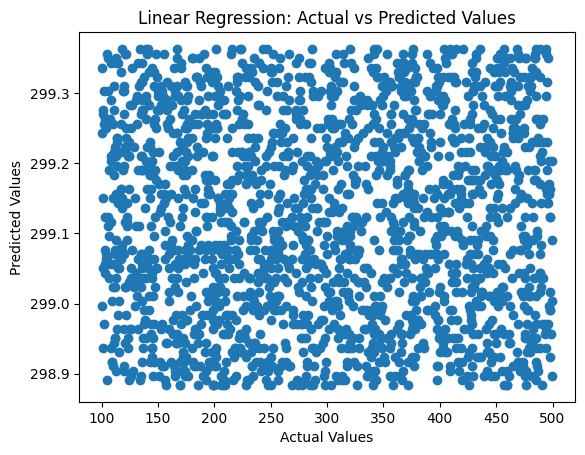

In [114]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, ypred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, ypred)

# Calculate R-squared
r_squared = r2_score(y_test, ypred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)

# plot
plt.scatter(y_test, ypred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Linear Regression: Actual vs Predicted Values")
plt.show()

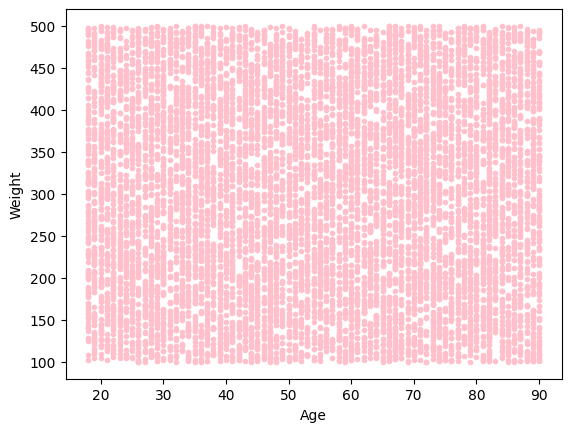

In [115]:
# Weight and Age
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x,y,color='pink',marker='.')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.show()

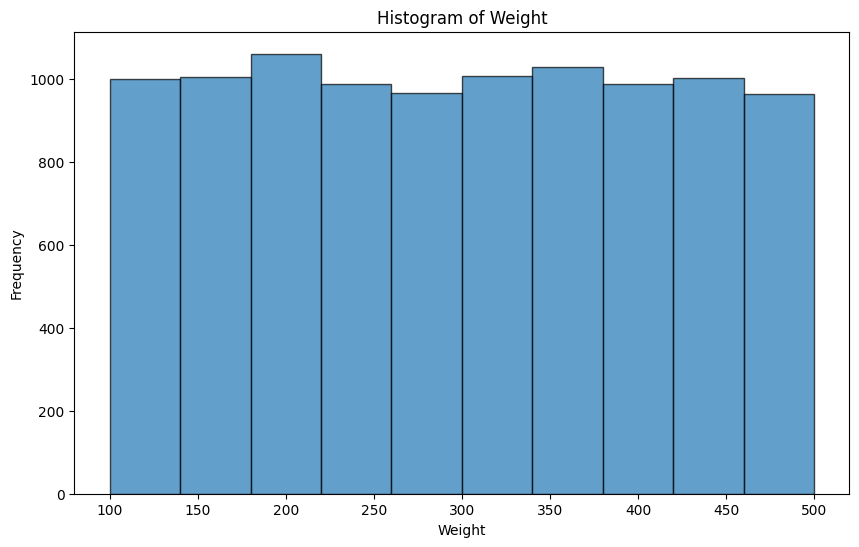

In [116]:
# Plotting the histogram
# in a real dataset there would be some type of linear correlation or distribution of weight
# this is a randomized data
plt.figure(figsize=(10, 6))
plt.hist(user_data_df.Weight, bins=10, edgecolor='k', alpha=0.7)
plt.title('Histogram of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()